In [200]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import pickle

In [201]:
#Loading data from csv file
vehicle_dataset = pd.read_csv("car data.csv")
vehicle_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


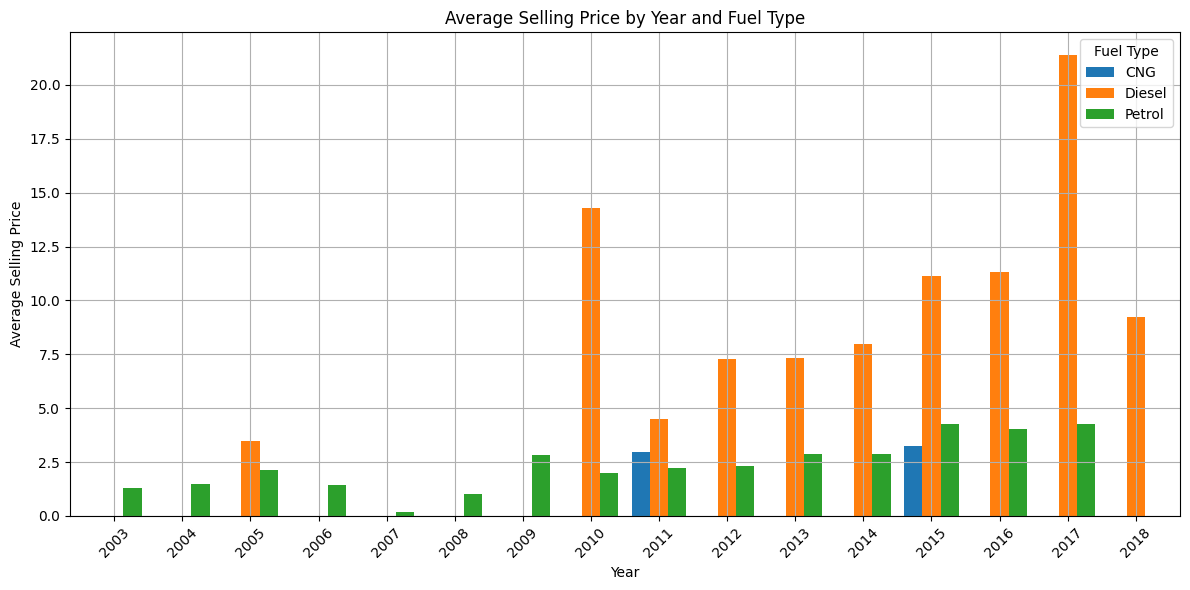

In [202]:
#Visualizing the average selling price by year and fuel type


# Group the data by 'Year' and 'Fuel_Type' and calculate the mean 'Selling_Price' for each combination
mean_selling_price_by_year_fuel = vehicle_dataset.groupby(['Year', 'Fuel_Type'])['Selling_Price'].mean().unstack()

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
mean_selling_price_by_year_fuel.plot(kind='bar', ax=plt.gca(), width=0.8)

# Add titles and labels
plt.title('Average Selling Price by Year and Fuel Type')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.legend(title='Fuel Type')

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Average Selling Price by Year and Fuel Type.png', dpi=300)
plt.show()


In [203]:
#Preprocessing data and Labling into a numerical format
# Label Encoding
label_encoder = LabelEncoder()
vehicle_dataset['Fuel_Type_encoded'] = label_encoder.fit_transform(vehicle_dataset['Fuel_Type'])
vehicle_dataset['Seller_Type_encoded'] = label_encoder.fit_transform(vehicle_dataset['Seller_Type'])
vehicle_dataset['Transmission_encoded'] = label_encoder.fit_transform(vehicle_dataset['Transmission'])
# vehicle_dataset.drop(columns=['Fuel_Type', 'Seller_Type', 'Transmission'], inplace=True)
vehicle_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_encoded,Seller_Type_encoded,Transmission_encoded
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,1


In [204]:
#Splitting data into training and testing 
X = vehicle_dataset.drop(['Car_Name', 'Present_Price', 'Fuel_Type',	'Seller_Type', 'Transmission'], axis = 1)
y = vehicle_dataset['Present_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [205]:
#Model training
#1. Using LinearRegression

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [206]:
#Saving the Model using pickle
with open("Vehicle Price Model(LinearRegression).pickle","wb") as f:
    pickle.dump(lin_reg_model, f)

In [207]:
#Testing the LinearRegression model
y_predict = lin_reg_model.predict(X_test)


In [208]:
accuracy = r2_score(y_test, y_predict)
accuracy

0.8278991998058403

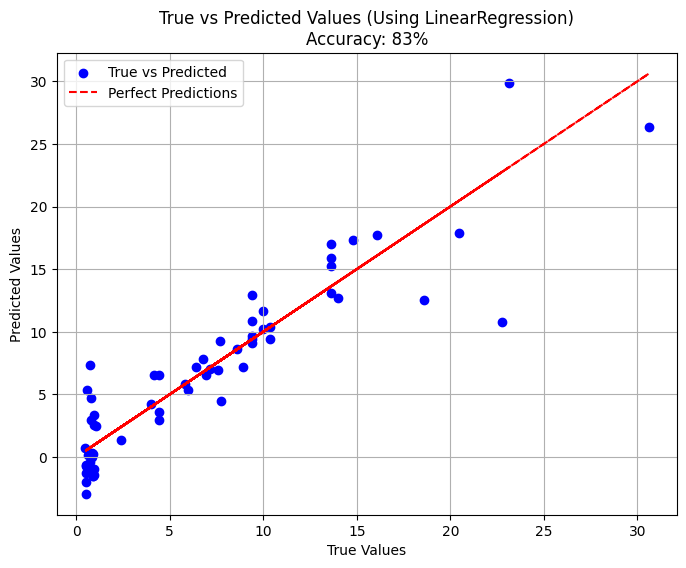

In [209]:
#Visualizing the true values and predicted values in a graphical representation using a scatter plot

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='blue', label='True vs Predicted')

# Add labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'True vs Predicted Values (Using LinearRegression)\nAccuracy: {round(accuracy*100)}%')

# Add a diagonal line representing perfect predictions
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Predictions')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
# Save the plot as an image file
plt.savefig('True vs Predicted Values (Using LinearRegression).png', dpi=300)
plt.show()

In [210]:
#Model training
#2. Using Lasso Regression

lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train, y_train)

Lasso()

In [211]:
#Saving the Model using pickle
with open("Vehicle Price Model(Lasso Regression).pickle","wb") as f:
    pickle.dump(lin_reg_model, f)

In [212]:
#Testing the LinearRegression model
y_predict = lasso_reg_model.predict(X_test)


In [213]:
accuracy = r2_score(y_test, y_predict)
accuracy

0.8608961150075916

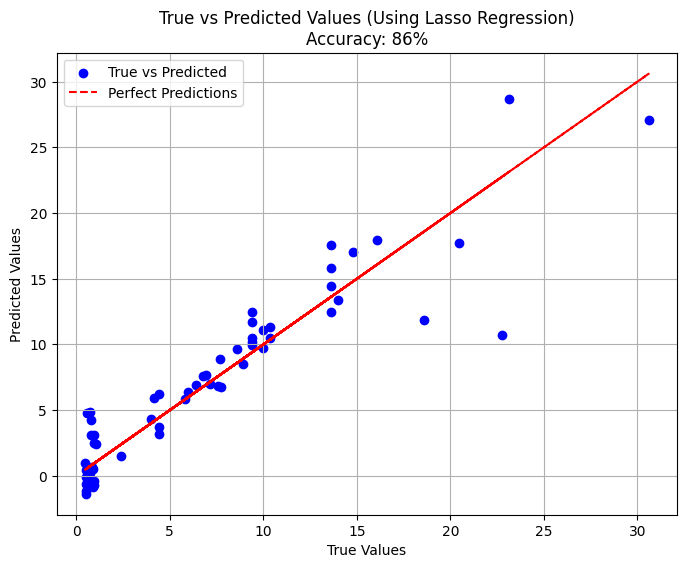

In [214]:
#Visualizing the true values and predicted values in a graphical representation using a scatter plot

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='blue', label='True vs Predicted')

# Add labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'True vs Predicted Values (Using Lasso Regression)\nAccuracy: {round(accuracy*100)}%')

# Add a diagonal line representing perfect predictions
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Predictions')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
# Save the plot as an image file
plt.savefig('True vs Predicted Values (Using Lasso Regression).png', dpi=300)
plt.show()

In [215]:
#Model training
#3. Using RandomForestRegressor

Rndm_Forest_model = RandomForestRegressor()
Rndm_Forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [216]:
#Saving the Model using pickle
with open("Vehicle Price Model(RandomForestRegressor).pickle","wb") as f:
    pickle.dump(lin_reg_model, f)

In [217]:
#Testing the LinearRegression model
y_predict = Rndm_Forest_model.predict(X_test)


In [218]:
accuracy = r2_score(y_test, y_predict)
accuracy

0.9588769241407835

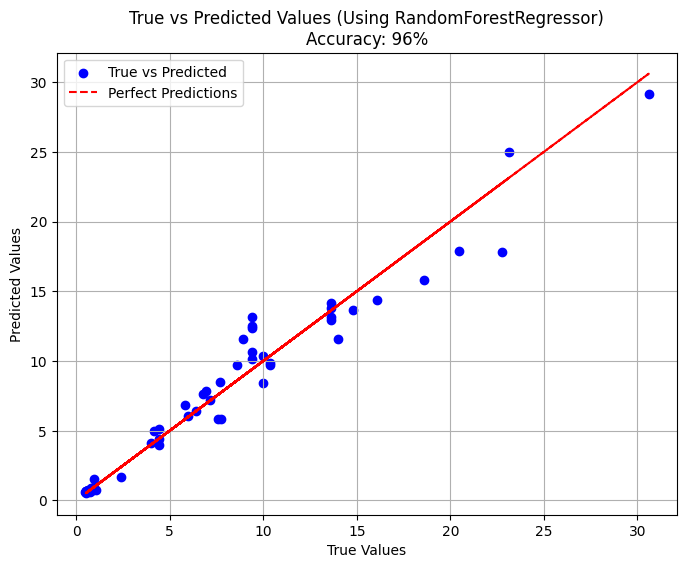

In [219]:
#Visualizing the true values and predicted values in a graphical representation using a scatter plot

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='blue', label='True vs Predicted')

# Add labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'True vs Predicted Values (Using RandomForestRegressor)\nAccuracy: {round(accuracy*100)}%')

# Add a diagonal line representing perfect predictions
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Predictions')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
# Save the plot as an image file
plt.savefig('True vs Predicted Values(Using RandomForestRegressor).png', dpi=300)
plt.show()